In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import geopandas

In [2]:
import sys
sys.path.append('/home/leandro/OrgaDeDatos/Fiuba-Big-Data-Analytics-TPs/Tp1/')
from BySanti import filter

In [3]:
train = pd.read_csv('/home/leandro/OrgaDeDatos/Fiuba-Big-Data-Analytics-TPs/Tp1/Datos/Entrenamieto_ECI_2020.csv')
#filter.full_correction(train)

In [4]:
train.head(20)

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None
5,16802,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,28,USD,14838277.5,USD,14838277.5,Closed Lost,Prod_Category_A_None
6,16799,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2017,NaT,7,USD,2659494.6,USD,2659494.6,Closed Lost,Prod_Category_A_None
7,27455,Americas,NW America,1,1,1,1,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,50688.0,USD,50688.0,Closed Won,Prod_Category_A_None
8,24353,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,...,Q1,2016,NaT,0,JPY,15600.0,JPY,470400.0,Closed Lost,Prod_Category_A_None
9,24355,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,...,Q1,2016,NaT,0,JPY,4400.0,JPY,470400.0,Closed Lost,Prod_Category_A_None


# Algunas de las Region Japan tienen Territory None, asi que reemplazo ese None por Japan

In [5]:
train.loc[(train.Territory =='None' )&(train.Region=='Japan'),'Territory'] = 'Japan'

In [6]:
train.head(20)

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None
5,16802,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,28,USD,14838277.5,USD,14838277.5,Closed Lost,Prod_Category_A_None
6,16799,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2017,NaT,7,USD,2659494.6,USD,2659494.6,Closed Lost,Prod_Category_A_None
7,27455,Americas,NW America,1,1,1,1,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,50688.0,USD,50688.0,Closed Won,Prod_Category_A_None
8,24353,Japan,Japan,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,...,Q1,2016,NaT,0,JPY,15600.0,JPY,470400.0,Closed Lost,Prod_Category_A_None
9,24355,Japan,Japan,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,...,Q1,2016,NaT,0,JPY,4400.0,JPY,470400.0,Closed Lost,Prod_Category_A_None


# Top Territorios con mas oportunidades

# Grafico con mapa


In [7]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = pd.DataFrame(world[world.name != 'Antarctica']).sort_values(by=['name'])
world.name.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herz.', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Rep.', 'Chad', 'Chile', 'China',
       'Colombia', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Côte d'Ivoire", 'Dem. Rep. Congo', 'Denmark',
       'Djibouti', 'Dominican Rep.', 'Ecuador', 'Egypt', 'El Salvador',
       'Eq. Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Is.',
       'Fiji', 'Finland', 'Fr. S. Antarctic Lands', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran',
       'Iraq', 'Ireland', 'Is

# # Reviso que los nombres de los paises esten iguales para que al graficar detecte todos los paises usando el GeoPandas

In [8]:

train.loc[(train.Billing_Country =='United States' ),'Billing_Country'] = 'United States of America'
train.loc[(train.Billing_Country =='Bosnia and Herzegovina'),'Billing_Country'] = 'Bosnia and Herz.'
train.loc[(train.Billing_Country =='Czech Republic'),'Billing_Country'] = 'Czechia'
train.loc[(train.Billing_Country =='Viet Nam'),'Billing_Country'] = 'Vietnam'
train.loc[(train.Billing_Country =='Korea, Republic of'),'Billing_Country'] = 'South Korea'
train.loc[(train.Billing_Country =='French Southern Territories'),'Billing_Country'] = 'France'
train.loc[(train.Billing_Country =='Dominican Republic'),'Billing_Country'] = 'Dominican Rep.'
train.loc[(train.Billing_Country =="Korea, Democratic People's Republic of"),'Billing_Country'] = 'North Korea'
train.loc[(train.Billing_Country =='Macedonia, the former Yugoslav Republic of'),'Billing_Country'] = 'Macedonia'


Detecto que hay algunos territorios que no se encuentran dentro del GeoDataFrame World

In [9]:
Territorios = train.groupby('Billing_Country').count().reset_index()[['Billing_Country']].copy()
Territorios['esta'] = Territorios['Billing_Country'].isin(world['name'])
Territorios[Territorios.esta == False]

,Billing_Country,esta
5,Bahrain,False
41,Liechtenstein,False
45,Malta,False
51,None,False
62,Reunion,False
64,Singapore,False


Con respecto a Singapore, Bahrain, Liechtenstein, Malta 

In [10]:
topPaises = train[['Billing_Country', 'Opportunity_Name','ID']].groupby(['Billing_Country','Opportunity_Name']).count().reset_index()
topPaises = topPaises[['Billing_Country','ID']].groupby('Billing_Country').count().reset_index().rename(columns = {'ID' : 'Total_Oportudidades'})\
             .sort_values(by=['Total_Oportudidades'],ascending=False)
topPaises

,Billing_Country,Total_Oportudidades
77,United States of America,2350
35,Japan,1899
26,Germany,1308
30,India,560
3,Australia,559
...,...,...
15,Chile,1
17,Colombia,1
22,Ecuador,1
54,Oman,1


In [11]:
#Esto es lo que hicimos pensando que cada linea era una oportunidad

#topPaises =  train[['Territory','ID']].groupby('Territory').count().rename(columns = {'ID' : 'Total_Oportudidades'})\
#            .sort_values(by=['Total_Oportudidades'],ascending=False)
#topPaises = topPaises.reset_index()
#topPaises

Genero el mapa finalmente

In [12]:
topPaisesMAP = pd.merge(topPaises,world,left_on="Billing_Country",right_on="name",how='right')

topPaisesMAP=geopandas.GeoDataFrame(topPaisesMAP)

topPaisesMAP['Total_Oportudidades'].fillna(0, inplace=True)

paisesSinDatos = topPaisesMAP[topPaisesMAP.Billing_Country.isnull()]
paisesSinDatos


,Billing_Country,Total_Oportudidades,pop_est,continent,name,iso_a3,gdp_md_est,geometry
73,NaN,0.0,34124811,Asia,Afghanistan,AFG,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
74,NaN,0.0,40969443,Africa,Algeria,DZA,609400.0,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948..."
75,NaN,0.0,29310273,Africa,Angola,AGO,189000.0,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4..."
76,NaN,0.0,9961396,Asia,Azerbaijan,AZE,167900.0,"MULTIPOLYGON (((46.40495 41.86068, 46.68607 41..."
77,NaN,0.0,329988,North America,Bahamas,BHS,9066.0,"MULTIPOLYGON (((-78.98000 26.79000, -78.51000 ..."
...,...,...,...,...,...,...,...,...
171,NaN,0.0,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
172,NaN,0.0,28036829,Asia,Yemen,YEM,73450.0,"POLYGON ((52.00001 19.00000, 52.78218 17.34974..."
173,NaN,0.0,15972000,Africa,Zambia,ZMB,65170.0,"POLYGON ((30.74001 -8.34001, 31.15775 -8.59458..."
174,NaN,0.0,13805084,Africa,Zimbabwe,ZWE,28330.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."


Text(0.5, 1.0, 'Oportunidades por Paises')

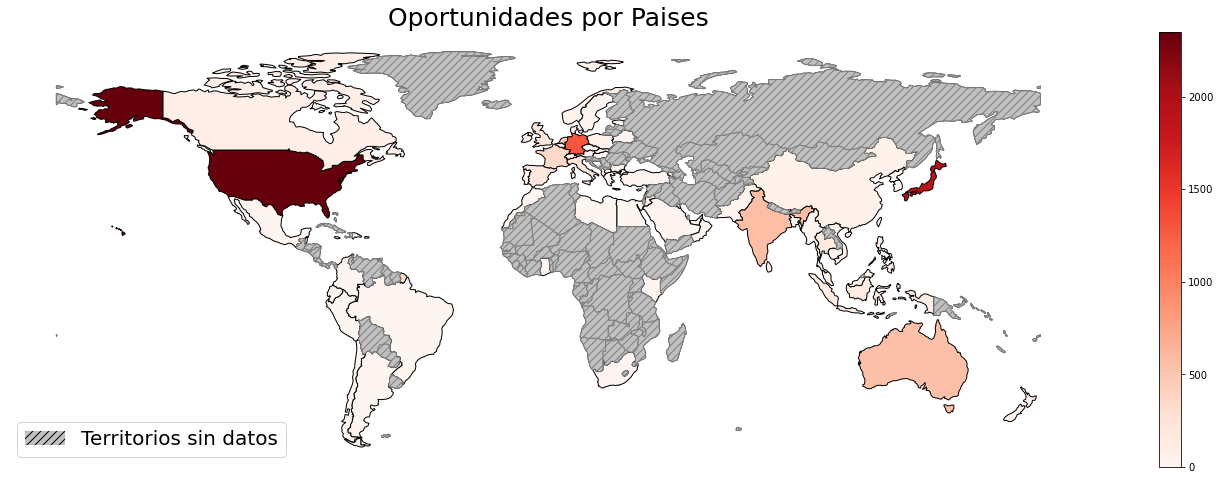

In [13]:
fig, ax = plt.subplots(1,figsize=(25, 8))
topPaisesMAP.plot(ax=ax,column="Total_Oportudidades",cmap="Reds",edgecolor='black', linewidth=1)
ax.axis('off')
paisesSinDatos.plot( ax = ax,color='silver', hatch= "///", edgecolor = "grey") 
vmin = topPaisesMAP['Total_Oportudidades'].min()
vmax = topPaisesMAP['Total_Oportudidades'].max()
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm)

missing = mpatches.Patch(facecolor = 'silver', hatch='///',label='Territorios sin datos')
plt.legend(handles=[missing], fontsize = 20, loc = 3)

plt.title('Oportunidades por Paises', fontsize=25)


# Bar Plot

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

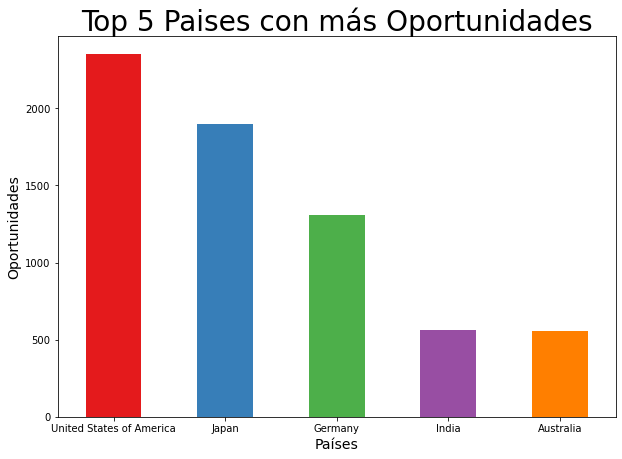

In [42]:
colores = plt.cm.Set1(range(5))
topPaises.head(5).plot(x= 'Billing_Country', y='Total_Oportudidades' ,kind = 'bar',legend = False,figsize= (10,7),color = colores)
plt.title('Top 5 Paises con más Oportunidades',fontsize=28)
plt.xlabel("Países", fontsize=14)
plt.ylabel("Oportunidades", fontsize=14)
plt.xticks(rotation=360, horizontalalignment="center")

# Opotunidades por año 

In [66]:
opor = train[['Delivery_Year','Delivery_Quarter', 'Opportunity_Name','ID']].groupby(['Delivery_Year','Delivery_Quarter','Opportunity_Name']).count().reset_index()
opor = opor[['Delivery_Year','Delivery_Quarter','ID']].groupby(['Delivery_Year','Delivery_Quarter']).count().reset_index().rename(columns = {'ID' : 'Total_Oportudidades'})
opor['Año'] = opor['Delivery_Year'].astype(str) +'_'+ opor['Delivery_Quarter']


oporPorAño = opor[['Año','Total_Oportudidades']]
oporPorAño

,Año,Total_Oportudidades
0,2016_Q1,513
1,2016_Q2,549
2,2016_Q3,603
3,2016_Q4,693
4,2017_Q1,873
5,2017_Q2,1085
6,2017_Q3,1091
7,2017_Q4,990
8,2018_Q1,855
9,2018_Q2,872


Text(0, 0.5, 'Oportunidades')

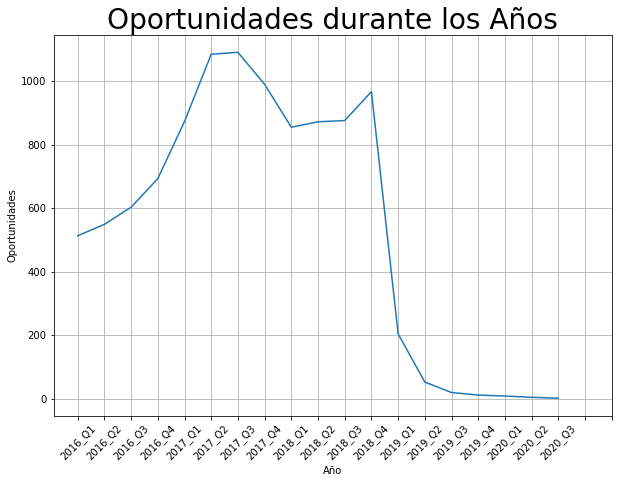

In [85]:

oporPorAño.plot(x = 'Año',y='Total_Oportudidades',kind = 'line',legend = False,grid = True,figsize= (10,7))
plt.title('Oportunidades durante los Años',fontsize=28)

tick_labels = tuple(oporPorAño['Año'])
x_max = int(max(plt.xticks()[0]))
plt.xticks(range(0, x_max + 1), tick_labels, rotation=45) 

plt.xlabel('Año')
plt.ylabel('Oportunidades')
